<a href="https://colab.research.google.com/github/KKawaguchi1219/seminar_animation/blob/main/Chemical_oscillator_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib import cm

In [ ]:
# x, y: IイオンとCIO2イオンの無次元化濃度(CIO2, I2, MAの反応速度はこの二つに比べて遅いので時間発展を無視)
def chemical_oscillator(t, z, a, b):
    x, y = z
    dxdt = a - x - 4*x*y/(1+x**2)
    dydt = b*x*(1 - y/(1+x**2))
    return [dxdt, dydt]

In [ ]:
t_span = [0, 30]
dt=0.1
t_s= np.arange(t_span[0], t_span[1], dt)

# 定数パラメータ；a,b(経験的な反応速度定数，CIO2, I2, MAの濃度に依存)
a=10
b=2

# 初期条件[x, y]
init_params_1 = [2.5, 5]
init_params_2 = [0, 2]

In [ ]:
slv_1 = solve_ivp(chemical_oscillator, t_span, init_params_1, t_eval=t_s, args=(a, b, ))
slv_2 = solve_ivp(chemical_oscillator, t_span, init_params_2, t_eval=t_s, args=(a, b, ))

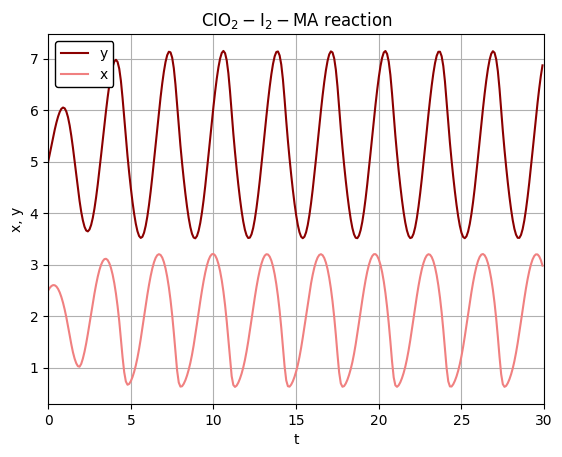

In [ ]:
plt.plot(t_s, slv_1.y[1], label='y', c='darkred')
plt.plot(t_s, slv_1.y[0], label='x', c='lightcoral')

plt.xlabel('t')
plt.ylabel('x, y')
plt.title(r'$\rm{CIO_{2}-I_{2}-MA}$ reaction')
plt.xlim(t_span[0], t_span[1])
plt.grid()
plt.legend(edgecolor='black', framealpha=1)
plt.show()

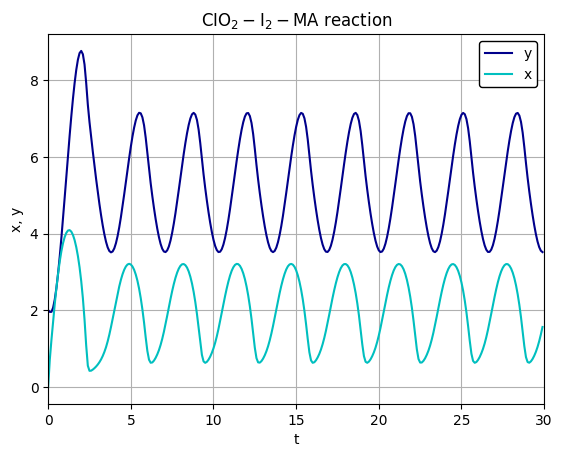

In [ ]:
plt.plot(t_s, slv_2.y[1], label='y', color='darkblue')
plt.plot(t_s, slv_2.y[0], label='x', color='c')

plt.xlabel('t')
plt.ylabel('x, y')
plt.title(r'$\rm{CIO_{2}-I_{2}-MA}$ reaction')
plt.xlim(t_span[0], t_span[1])
plt.grid()
plt.legend(edgecolor='black', framealpha=1)
plt.show()

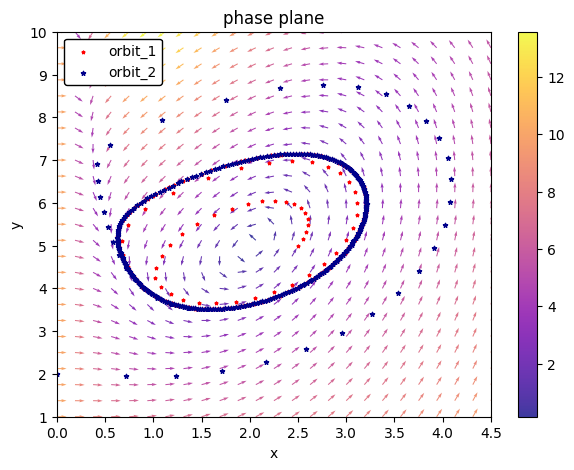

In [ ]:
y, x = np.mgrid[1:10:25j, 0:4.5:25j]  # ベクトル場を描画する範囲
U = a - x - 4*x*y/(1+x**2)  # dx/dt = a - x - 4*x*y/(1+x**2)
V = b*x*(1 - y/(1+x**2))    # dy/dt = b*x*(1 - y/(1+x**2))
magnitude = np.sqrt(U**2 + V**2)


fig, ax = plt.subplots(figsize=(7, 5))
quiver=ax.quiver(x, y, U/magnitude, V/magnitude, magnitude, cmap=cm.plasma, alpha=0.8)
cbar = fig.colorbar(quiver, ax=ax)
ax.scatter(slv_1.y[0], slv_1.y[1], marker='*', c='r', s=5, label='orbit_1')
ax.scatter(slv_2.y[0], slv_2.y[1], marker='*', c='darkblue', s=10, label='orbit_2')

ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_title("phase plane")
ax.set_xlim(0, 4.5)
ax.set_ylim(1, 10)
ax.legend(edgecolor='black', framealpha=1, loc='upper left')
plt.show()

<ipython-input-100-920d42cfc141>:67: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point_1.set_data(slv_1.y[0][i], slv_1.y[1][i])
<ipython-input-100-920d42cfc141>:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point_2.set_data(slv_2.y[0][i], slv_2.y[1][i])
<ipython-input-100-920d42cfc141>:67: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point_1.set_data(slv_1.y[0][i], slv_1.y[1][i])
<ipython-input-100-920d42cfc141>:69: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_point_2.set_data(slv_2.y[0][i], slv_2.y[1][i])


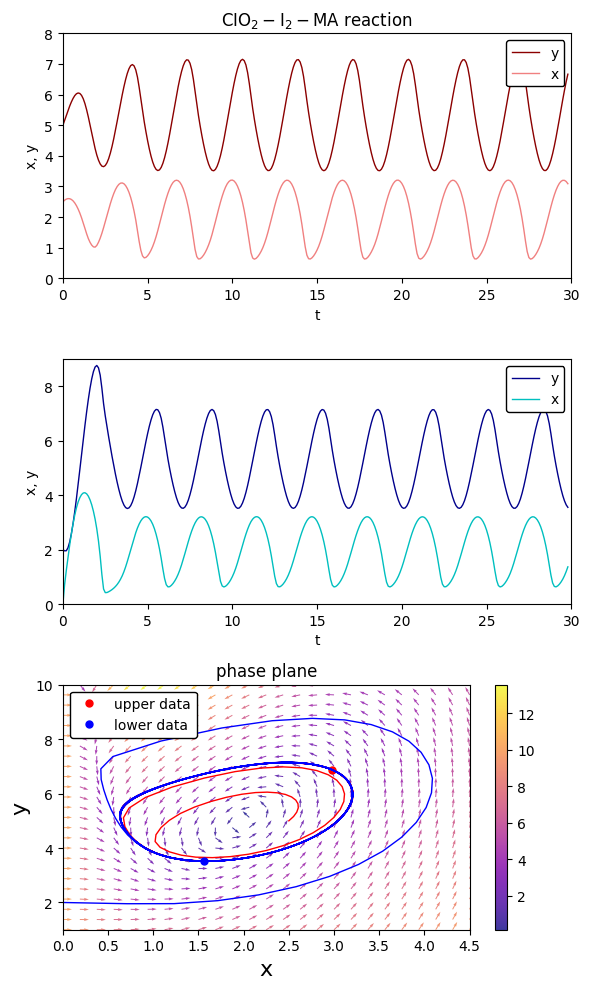

In [ ]:
x_data_1 = []
xdot_data_1 = []
x_data_2 = []
xdot_data_2 = []

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, figsize=(6,10))

# 周期解の時間プロット_1
ax1.set_title(r'$\rm{CIO_{2}-I_{2}-MA}$ reaction')
ax1.set_xlim(t_span[0], t_span[1])
ax1.set_ylim(0,8)
ax1.set_xlabel('t')
ax1.set_ylabel('x, y')

line_xdot_1, = ax1.plot([], [], c='darkred', linewidth=1, label='y')
line_x_1, = ax1.plot([], [], c='lightcoral', linewidth=1, label='x') # このlineに次々と座標を代入して描画

ax1.legend(edgecolor='black', framealpha=1, loc='upper right')

# 周期解の時間プロット_2
ax2.set_xlim(t_span[0], t_span[1])
ax2.set_ylim(0,9)
ax2.set_xlabel('t')
ax2.set_ylabel('x, y')

line_xdot_2, = ax2.plot([], [], c='darkblue', linewidth=1, label='y')
line_x_2, = ax2.plot([], [], c='c', linewidth=1, label='x') # このlineに次々と座標を代入して描画

ax2.legend(edgecolor='black', framealpha=1, loc='upper right')

#相平面アニメーション
y, x = np.mgrid[1:10:25j, 0:4.5:25j]  # ベクトル場を描画する範囲
U = a - x - 4*x*y/(1+x**2)  # dx/dt = a - x - 4*x*y/(1+x**2)
V = b*x*(1 - y/(1+x**2))    # dy/dt = b*x*(1 - y/(1+x**2))
magnitude = np.sqrt(U**2 + V**2)

quiver = ax3.quiver(x, y, U/magnitude, V/magnitude, magnitude, cmap=cm.plasma, alpha=0.8)
cbar = fig.colorbar(quiver, ax=ax3)

phase_point_1, = ax3.plot([], [], 'ro', markersize=5, label='upper data')
phase_line_1, = ax3.plot([], [], 'r-', lw=1)
phase_point_2, = ax3.plot([], [], 'bo', markersize=5, label='lower data')
phase_line_2, = ax3.plot([], [], 'b-', lw=1)

ax3.set_xlim(0, 4.5)
ax3.set_ylim(1, 10)
ax3.set_xlabel('x', fontsize=16)
ax3.set_ylabel('y', fontsize=16)
ax3.legend(edgecolor='black', framealpha=1, loc='upper left')
ax3.set_title("phase plane")

plt.tight_layout()

def animation(i):
    # 振動子の時間変位を更新
    line_x_1.set_data(t_s[:i], slv_1.y[0][:i])
    line_xdot_1.set_data(t_s[:i], slv_1.y[1][:i])
    line_x_2.set_data(t_s[:i], slv_2.y[0][:i])
    line_xdot_2.set_data(t_s[:i], slv_2.y[1][:i])

    # 相平面データ更新
    x_data_1.append(slv_1.y[0][i])
    xdot_data_1.append(slv_1.y[1][i])
    x_data_2.append(slv_2.y[0][i])
    xdot_data_2.append(slv_2.y[1][i])

    phase_point_1.set_data(slv_1.y[0][i], slv_1.y[1][i])
    phase_line_1.set_data(x_data_1, xdot_data_1)
    phase_point_2.set_data(slv_2.y[0][i], slv_2.y[1][i])
    phase_line_2.set_data(x_data_2, xdot_data_2)

    return line_x_1, line_xdot_1, line_x_2, line_xdot_2, phase_point_1, phase_line_1, phase_point_2, phase_line_2

ani = FuncAnimation(fig, animation, frames=np.arange(0, len(t_s)), interval=dt*1000, blit=True)

filename = "chemical_oscillator.mp4"
writer = FFMpegWriter(fps=30, metadata={"artist": "Matplotlib"}, bitrate=1800)
ani.save(filename, writer=writer)

plt.show()

#ani.save('pendulum.gif', writer='pillow', fps=15)

In [ ]:
# mp4動画の再生
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/chemical_oscillator.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="25%" height="25%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")